# BGS Signal-to-Noise Ratio and Redshift Efficiency: QA

In [48]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack
from astropy.io import fits
import seaborn as sns
sns.set(style='white', font_scale=1.1, palette='deep')

In [49]:
from desiutil.log import get_logger, DEBUG
log = get_logger()

In [50]:
from desistudy_qa import qa_zmag, qa_efficiency, qa_zwarn4, qa_radec

In [51]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Just a few things we need to define to set things up

In [52]:
sim_names = ['sim12','sim13','sim14','sim16','sim17','sim18']

In [53]:
simdir = os.path.join(os.getenv('DESI_ROOT'), 'spectro', 'sim', 'bgs', 'kremin', 'flat_priors')

In [54]:
from desistudy_qa import get_all_sims_obs

sim_names = np.asarray(sim_names)
sims, conditions = get_all_sims_obs(sim_names)

# Analyze the outputs.

Sims 12-14 have magnitude range 17.0-19.5 and z-range 0.1-0.6

Sims 16-18 have magnitude range 19.5-20 and z-range 0.1-0.8



In [55]:
from desistudy_qa import print_file_locations
print_file_locations(simdir,sims)

In /global/project/projectdirs/desi/spectro/sim/bgs/kremin/flat_priors/ :
	In sim12/:
	In sim13/:
		   bgs-sim13-results.fits
	In sim14/:
		   bgs-sim14-results.fits
	In sim16/:
		   bgs-sim16-results.fits
	In sim17/:
		   bgs-sim17-results.fits
	In sim18/:
		   bgs-sim18-results.fits


## Sim 12

In [56]:
current_sim_name = 'sim12'

In [57]:
from desistudy_qa import print_sim_params
print_sim_params(current_sim_name, sim_names, sims, conditions)

Sim: sim12
	Sim Parameters: 
		suffix: sim12
		use_mock: False
		nsim: 2
		nspec: 4000
		zmin: 0.1
		zmax: 0.6
		rmagmin: 17.0
		rmagmax: 19.5
		seed: 1968
	Obs Parameters: 
		AIRMASS: 1.0
		SEEING: 1.1
		MOONALT: 30
		MOONSEP: 60
		EXPTIME: 480
		MOONFRAC: 0.8


In [58]:
# sim 12
if current_sim_name in sim_names:
    ind = np.where(sim_names==current_sim_name)[0][0]
    sim,obs = sims[ind],conditions[ind]
    
    resultfile = os.path.join(simdir, sim['suffix'], 'bgs-{}-results.fits'.format(sim['suffix']))
    if os.path.exists(resultfile):
        print('Sim: {} with nspec: {} and nsim: {}'.format(sim['suffix'],sim['nspec'],sim['nsim']))

        if 'EXPTIME' in obs.keys(): exptime = "{}".format(obs['EXPTIME'])
        else:                       exptime = "{}-{}".format(obs['exptimemin'],obs['exptimemax'])

        if 'MOONFRAC' in obs.keys(): moonfrac = "{}".format(obs['MOONFRAC'])
        else:                        moonfrac = "{}-{}".format(obs['moonfracmin'],obs['moonfracmax'])

        print('ObsConds ExpTime: {}, MoonFrac: {}, MoonAlt: {}, MoonSep: {}'.format(exptime,moonfrac,obs['MOONALT'],obs['MOONSEP']))
        result = Table.read(resultfile)
        #result.pprint()
        qa_zmag(result['ZTRUE'], result['RMAG'], maglabel=r'$r_{\rm DECaLS}$ (AB mag)', faintmag=19.5)
        qa_efficiency(result)
        qa_zwarn4(result)   

## Sim 13

In [59]:
current_sim_name = 'sim13'

In [60]:
print_sim_params(current_sim_name, sim_names, sims, conditions)

Sim: sim13
	Sim Parameters: 
		suffix: sim13
		use_mock: False
		nsim: 10
		nspec: 1000
		zmin: 0.1
		zmax: 0.6
		rmagmin: 17.0
		rmagmax: 19.5
		seed: 2132
	Obs Parameters: 
		AIRMASS: 1.0
		SEEING: 1.1
		MOONALT: 30
		MOONSEP: 60
		exptimemin: 300
		exptimemax: 720
		MOONFRAC: 0.8


Sim: sim13 with nspec: 1000 and nsim: 10
ObsConds ExpTime: 300-720, MoonFrac: 0.8, MoonAlt: 30, MoonSep: 60


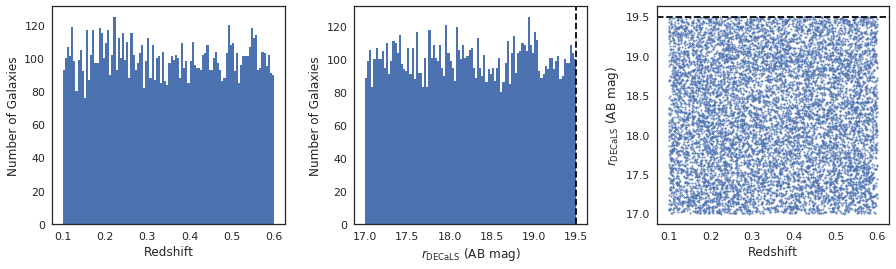

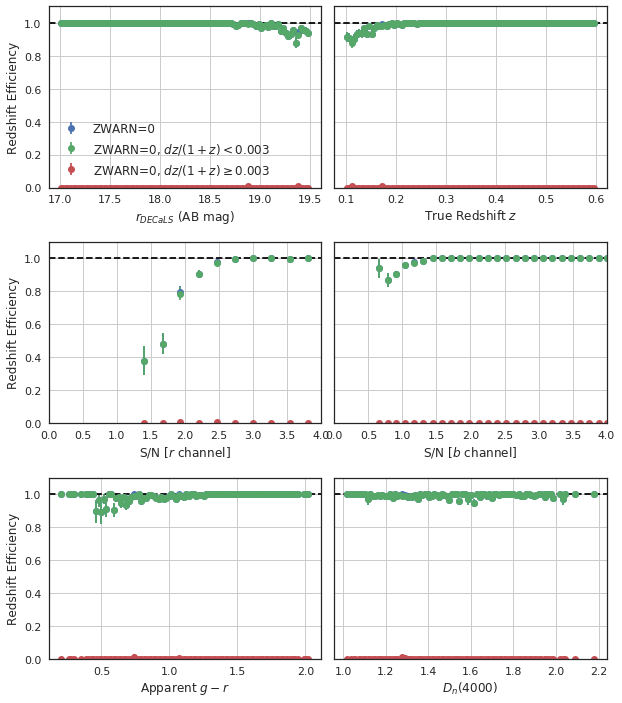

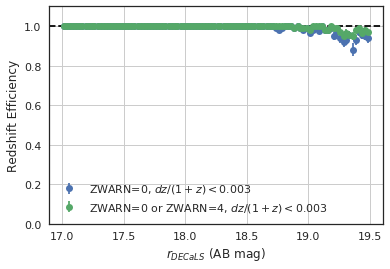

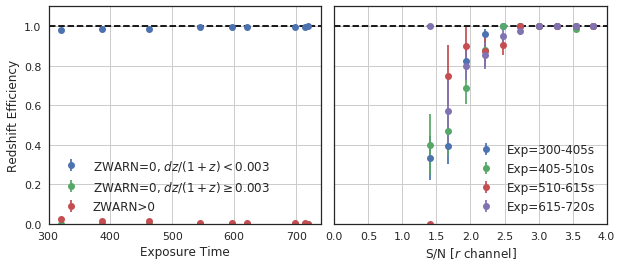

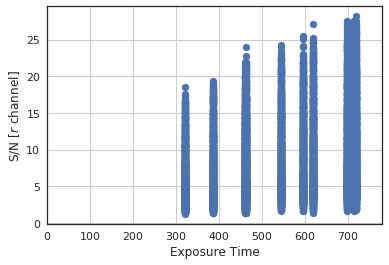

In [61]:
# sim 13
from desistudy_qa import qa_exptime

if current_sim_name in sim_names:
    ind = np.where(sim_names==current_sim_name)[0][0]
    sim,obs = sims[ind],conditions[ind]
    
    resultfile = os.path.join(simdir, sim['suffix'], 'bgs-{}-results.fits'.format(sim['suffix']))
    if os.path.exists(resultfile):
        print('Sim: {} with nspec: {} and nsim: {}'.format(sim['suffix'],sim['nspec'],sim['nsim']))

        if 'EXPTIME' in obs.keys(): exptime = "{}".format(obs['EXPTIME'])
        else:                       exptime = "{}-{}".format(obs['exptimemin'],obs['exptimemax'])

        if 'MOONFRAC' in obs.keys(): moonfrac = "{}".format(obs['MOONFRAC'])
        else:                        moonfrac = "{}-{}".format(obs['moonfracmin'],obs['moonfracmax'])

        print('ObsConds ExpTime: {}, MoonFrac: {}, MoonAlt: {}, MoonSep: {}'.format(exptime,moonfrac,obs['MOONALT'],obs['MOONSEP']))
        result = Table.read(resultfile)
        qa_zmag(result['ZTRUE'], result['RMAG'], maglabel=r'$r_{\rm DECaLS}$ (AB mag)', faintmag=19.5)
        qa_efficiency(result)
        qa_zwarn4(result)
        qa_exptime(result,"zeff_vs_exptime.png")

## Sim 14

In [62]:
current_sim_name = 'sim14'

In [63]:
print_sim_params(current_sim_name, sim_names, sims, conditions)

Sim: sim14
	Sim Parameters: 
		suffix: sim14
		use_mock: False
		nsim: 10
		nspec: 1000
		zmin: 0.1
		zmax: 0.6
		rmagmin: 17.0
		rmagmax: 19.5
		seed: 2296
	Obs Parameters: 
		AIRMASS: 1.0
		SEEING: 1.1
		MOONALT: 30
		MOONSEP: 60
		EXPTIME: 600
		moonfracmin: 0.6
		moonfracmax: 0.98


Sim: sim14 with nspec: 1000 and nsim: 10
ObsConds ExpTime: 600, MoonFrac: 0.6-0.98, MoonAlt: 30, MoonSep: 60


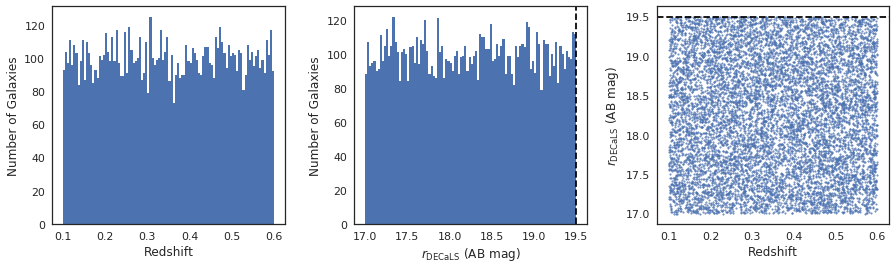

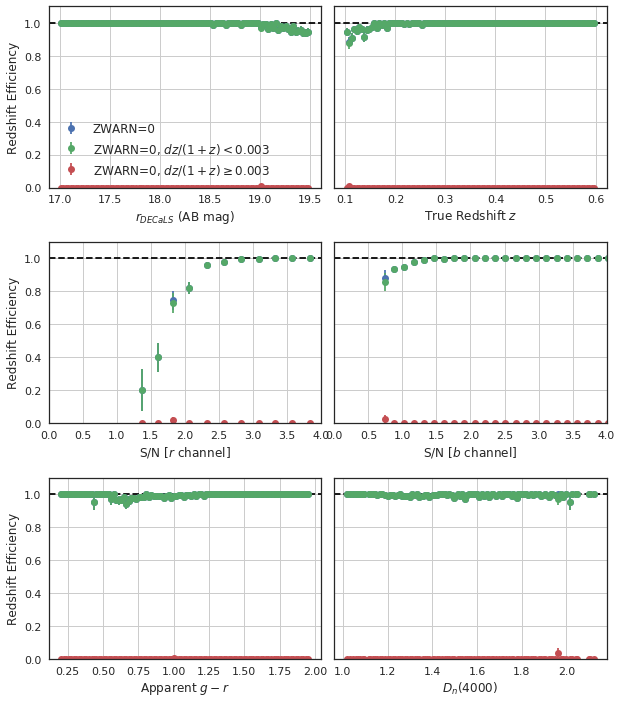

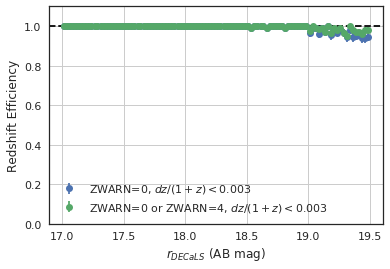

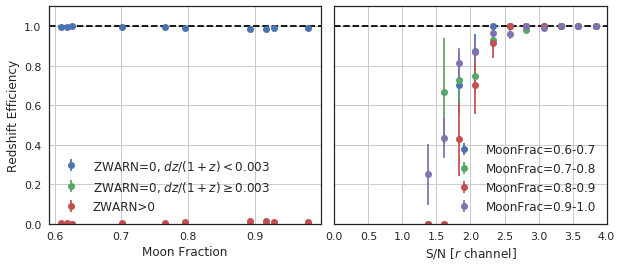

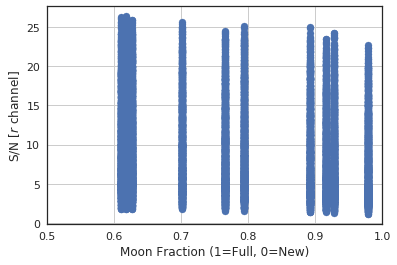

In [64]:
# sim 14
from desistudy_qa import qa_moonfrac

if current_sim_name in sim_names:
    ind = np.where(sim_names==current_sim_name)[0][0]
    sim,obs = sims[ind],conditions[ind]
    
    resultfile = os.path.join(simdir, sim['suffix'], 'bgs-{}-results.fits'.format(sim['suffix']))
    if os.path.exists(resultfile):
        print('Sim: {} with nspec: {} and nsim: {}'.format(sim['suffix'],sim['nspec'],sim['nsim']))

        if 'EXPTIME' in obs.keys(): exptime = "{}".format(obs['EXPTIME'])
        else:                       exptime = "{}-{}".format(obs['exptimemin'],obs['exptimemax'])

        if 'MOONFRAC' in obs.keys(): moonfrac = "{}".format(obs['MOONFRAC'])
        else:                        moonfrac = "{}-{}".format(obs['moonfracmin'],obs['moonfracmax'])

        print('ObsConds ExpTime: {}, MoonFrac: {}, MoonAlt: {}, MoonSep: {}'.format(exptime,moonfrac,obs['MOONALT'],obs['MOONSEP']))
        result = Table.read(resultfile)
        qa_zmag(result['ZTRUE'], result['RMAG'], maglabel=r'$r_{\rm DECaLS}$ (AB mag)', faintmag=19.5)
        qa_efficiency(result)
        qa_zwarn4(result)
        qa_moonfrac(result,"zeff_vs_moonfrac.png")

## Sim 16

In [65]:
current_sim_name = 'sim16'

In [66]:
print_sim_params(current_sim_name, sim_names, sims, conditions)

Sim: sim16
	Sim Parameters: 
		suffix: sim16
		use_mock: False
		nsim: 2
		nspec: 800
		zmin: 0.1
		zmax: 0.8
		rmagmin: 19.5
		rmagmax: 20.0
		seed: 2624
	Obs Parameters: 
		AIRMASS: 1.0
		SEEING: 1.1
		MOONALT: 30
		MOONSEP: 60
		EXPTIME: 480
		MOONFRAC: 0.8


Sim: sim16 with nspec: 800 and nsim: 2
ObsConds ExpTime: 480, MoonFrac: 0.8, MoonAlt: 30, MoonSep: 60


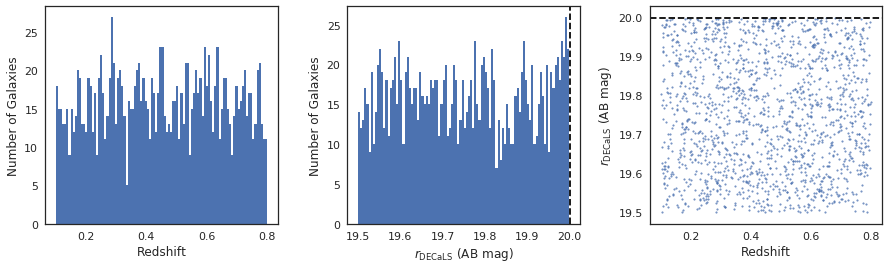

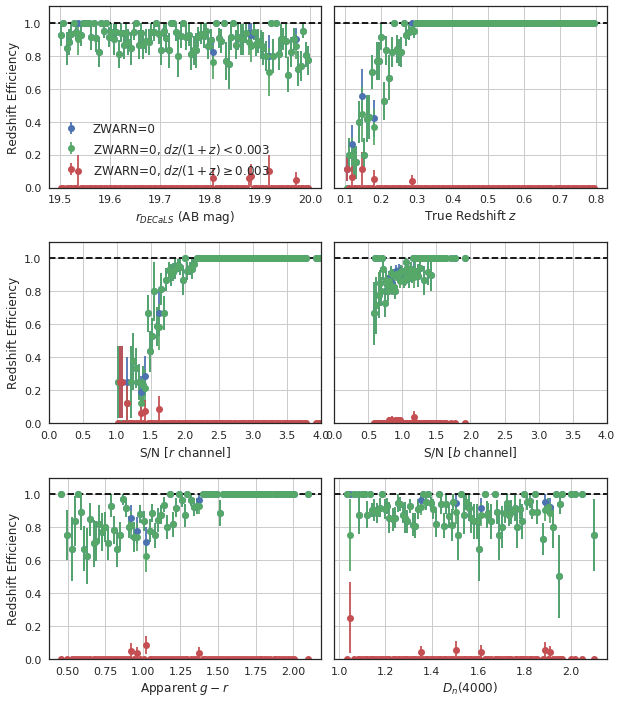

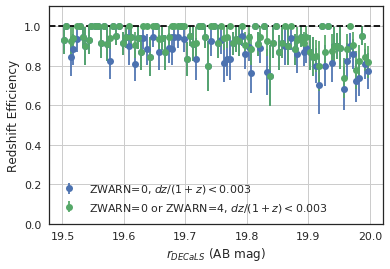

In [67]:
# sim 16
if current_sim_name in sim_names:
    ind = np.where(sim_names==current_sim_name)[0][0]
    sim,obs = sims[ind],conditions[ind]
    
    resultfile = os.path.join(simdir, sim['suffix'], 'bgs-{}-results.fits'.format(sim['suffix']))
    if os.path.exists(resultfile):
        print('Sim: {} with nspec: {} and nsim: {}'.format(sim['suffix'],sim['nspec'],sim['nsim']))

        if 'EXPTIME' in obs.keys(): exptime = "{}".format(obs['EXPTIME'])
        else:                       exptime = "{}-{}".format(obs['exptimemin'],obs['exptimemax'])

        if 'MOONFRAC' in obs.keys(): moonfrac = "{}".format(obs['MOONFRAC'])
        else:                        moonfrac = "{}-{}".format(obs['moonfracmin'],obs['moonfracmax'])

        print('ObsConds ExpTime: {}, MoonFrac: {}, MoonAlt: {}, MoonSep: {}'.format(exptime,moonfrac,obs['MOONALT'],obs['MOONSEP']))
        result = Table.read(resultfile)
        #result.pprint()
        qa_zmag(result['ZTRUE'], result['RMAG'], maglabel=r'$r_{\rm DECaLS}$ (AB mag)', faintmag=20.)
        qa_efficiency(result)
        qa_zwarn4(result)   

## Sim 17

In [68]:
current_sim_name = 'sim17'

In [69]:
print_sim_params(current_sim_name, sim_names, sims, conditions)

Sim: sim17
	Sim Parameters: 
		suffix: sim17
		use_mock: False
		nsim: 10
		nspec: 200
		zmin: 0.1
		zmax: 0.8
		rmagmin: 19.5
		rmagmax: 20.0
		seed: 2788
	Obs Parameters: 
		AIRMASS: 1.0
		SEEING: 1.1
		MOONALT: 30
		MOONSEP: 60
		exptimemin: 300
		exptimemax: 720
		MOONFRAC: 0.8


Sim: sim17 with nspec: 200 and nsim: 10
ObsConds ExpTime: 300-720, MoonFrac: 0.8, MoonAlt: 30, MoonSep: 60


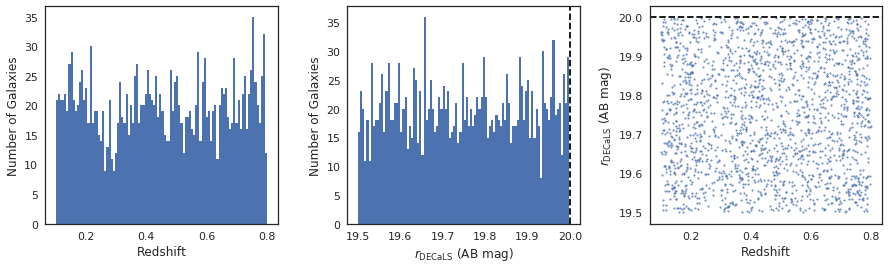

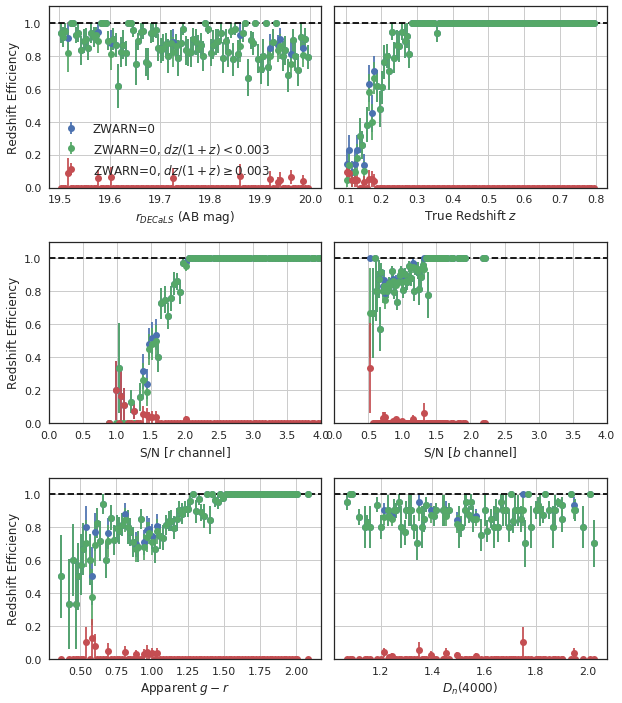

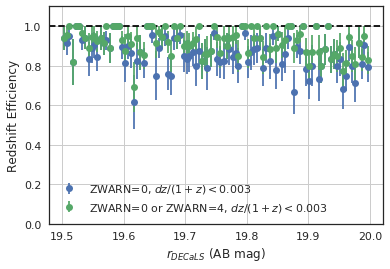

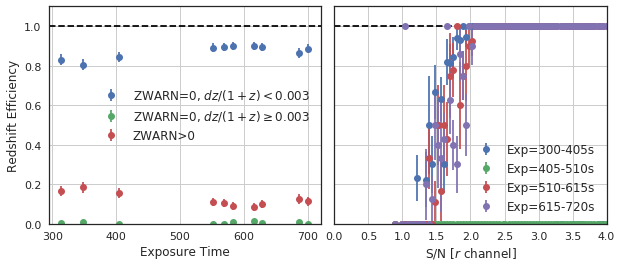

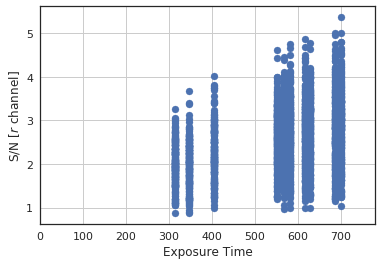

In [70]:
# sim 17
if current_sim_name in sim_names:
    ind = np.where(sim_names==current_sim_name)[0][0]
    sim,obs = sims[ind],conditions[ind]
    
    resultfile = os.path.join(simdir, sim['suffix'], 'bgs-{}-results.fits'.format(sim['suffix']))
    if os.path.exists(resultfile):
        print('Sim: {} with nspec: {} and nsim: {}'.format(sim['suffix'],sim['nspec'],sim['nsim']))

        if 'EXPTIME' in obs.keys(): exptime = "{}".format(obs['EXPTIME'])
        else:                       exptime = "{}-{}".format(obs['exptimemin'],obs['exptimemax'])

        if 'MOONFRAC' in obs.keys(): moonfrac = "{}".format(obs['MOONFRAC'])
        else:                        moonfrac = "{}-{}".format(obs['moonfracmin'],obs['moonfracmax'])

        print('ObsConds ExpTime: {}, MoonFrac: {}, MoonAlt: {}, MoonSep: {}'.format(exptime,moonfrac,obs['MOONALT'],obs['MOONSEP']))
        result = Table.read(resultfile)
        qa_zmag(result['ZTRUE'], result['RMAG'], maglabel=r'$r_{\rm DECaLS}$ (AB mag)', faintmag=20.)
        qa_efficiency(result)
        qa_zwarn4(result)
        qa_exptime(result,"zeff_vs_exptime.png")

## Sim 18

In [71]:
current_sim_name = 'sim18'

In [72]:
print_sim_params(current_sim_name, sim_names, sims, conditions)

Sim: sim18
	Sim Parameters: 
		suffix: sim18
		use_mock: False
		nsim: 10
		nspec: 200
		zmin: 0.1
		zmax: 0.8
		rmagmin: 19.5
		rmagmax: 20.0
		seed: 2952
	Obs Parameters: 
		AIRMASS: 1.0
		SEEING: 1.1
		MOONALT: 30
		MOONSEP: 60
		EXPTIME: 600
		moonfracmin: 0.6
		moonfracmax: 0.98


Sim: sim18 with nspec: 200 and nsim: 10
ObsConds ExpTime: 600, MoonFrac: 0.6-0.98, MoonAlt: 30, MoonSep: 60


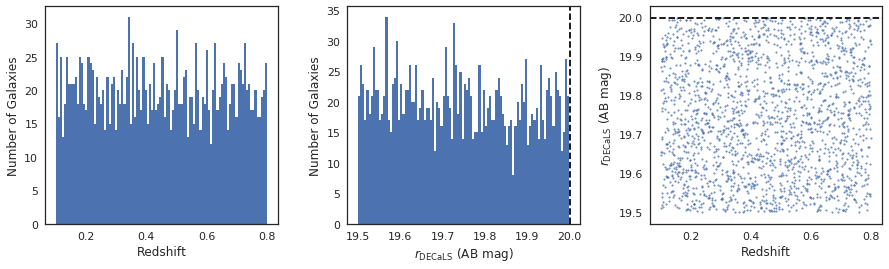

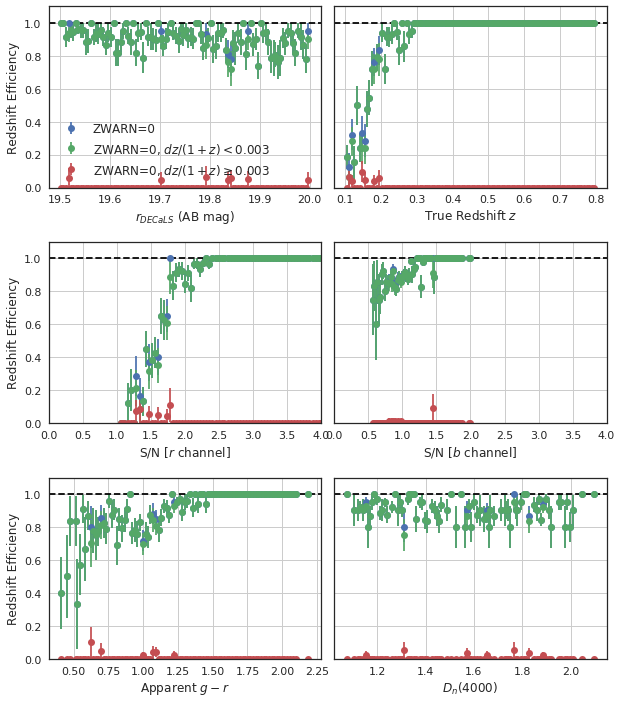

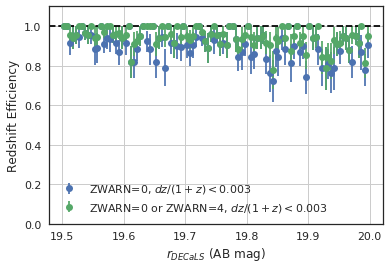

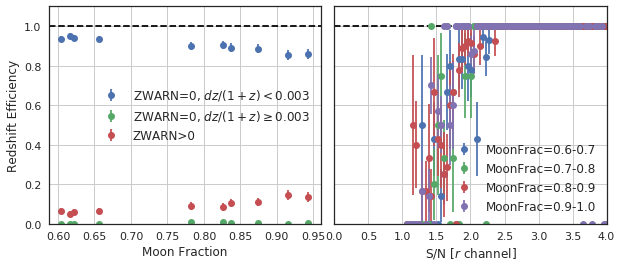

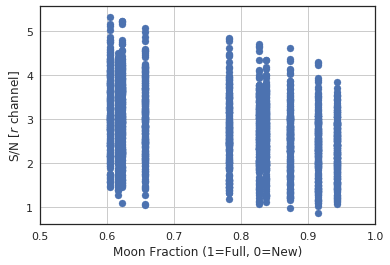

In [73]:
# sim 18
if current_sim_name in sim_names:
    ind = np.where(sim_names==current_sim_name)[0][0]
    sim,obs = sims[ind],conditions[ind]
    
    resultfile = os.path.join(simdir, sim['suffix'], 'bgs-{}-results.fits'.format(sim['suffix']))
    if os.path.exists(resultfile):
        print('Sim: {} with nspec: {} and nsim: {}'.format(sim['suffix'],sim['nspec'],sim['nsim']))

        if 'EXPTIME' in obs.keys(): exptime = "{}".format(obs['EXPTIME'])
        else:                       exptime = "{}-{}".format(obs['exptimemin'],obs['exptimemax'])

        if 'MOONFRAC' in obs.keys(): moonfrac = "{}".format(obs['MOONFRAC'])
        else:                        moonfrac = "{}-{}".format(obs['moonfracmin'],obs['moonfracmax'])

        print('ObsConds ExpTime: {}, MoonFrac: {}, MoonAlt: {}, MoonSep: {}'.format(exptime,moonfrac,obs['MOONALT'],obs['MOONSEP']))
        result = Table.read(resultfile)
        qa_zmag(result['ZTRUE'], result['RMAG'], maglabel=r'$r_{\rm DECaLS}$ (AB mag)', faintmag=20.)
        qa_efficiency(result)
        qa_zwarn4(result)
        qa_moonfrac(result,"zeff_vs_moonfrac.png")